<a href="https://colab.research.google.com/github/artms-18/tensorflow_fundamentals/blob/main/neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definition for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number

In [2]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.4.1


## Creating data to view and fit

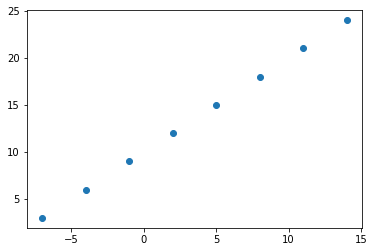

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels

y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it

plt.scatter(X,y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim # this is why it has no shape

0

In [10]:
X[0], y[0] #we want a model that can take an input X and output y, use 1 x value to predict 1 y value

(-7.0, 3.0)

In [11]:
# Turn our Numpy array into tensors

X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y



(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape = X[0].shape 
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model ** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to imporve the patterns its learning) and evaluation metrics (what we can use to interpret the moerformance of our model).

3. ** Fitting a model**  - letting the model try to find patterns between X and y (features and labels).

In [13]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 511ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 

In [14]:
# check out x and y 

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# try and make a prediction

y_pred = model.predict([17.0])
y_pred

array([[30.158512]], dtype=float32)

## Imporoving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function

3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer or on more data)

In [16]:
# :et's rebild our model

import tensorflow as tf
from tensorflow import keras
# 1. Create the model

model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics = ['mae'])

#3. Fit the model

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 269ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 4m

In [17]:
# Let's see if model's prediction has imprtoved

model.predict([17.0])

array([[29.739855]], dtype=float32)

In [30]:
# Let's rebuild the model

model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation = 'relu'),
        tf.keras.layers.Dense(100, activation = 'relu'),
        tf.keras.layers.Dense(1)
])

In [34]:
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(), metrics = ['mae'])

model.fit(X, y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 380ms/step - loss: 0.2780 - mae: 0.2780
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5294 - mae: 0.5294
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3997 - mae: 0.3997
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1593 - mae: 0.1593
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3074 - mae: 0.3074
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 0.3437 - mae: 0.3437
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2695 - mae: 0.2695
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1653 - mae: 0.1653
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2814 - mae: 0.2814
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2710 - mae: 0.2710
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.180

In [36]:
model.predict([17.0])

array([[27.097845]], dtype=float32)

## Evaluating a model